In [6]:
!pip install python-weather
!pip install geopandas
!pip install geodatasets
!pip install folium
!pip install mapclassify
!pip install matplotlib

In [7]:
import python_weather
client = python_weather.Client(unit=python_weather.IMPERIAL)

In [8]:
weather = await client.get("Chapel Hill")
weather

<Weather current=<CurrentForecast temperature=53 description='Partly cloudy' kind="Kind.PARTLY_CLOUDY"> location=(35.91, -79.06)>

In [9]:
import geopandas
from geodatasets import get_path

path_to_data = get_path("naturalearthland")
gdf = geopandas.read_file(path_to_data)

gdf

# geodatasets.data

c:\Users\santi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Land,0,0.0,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Land,0,0.0,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


In [10]:
gdf = gdf.set_index("featurecla")
gdf["area"] = gdf.area
gdf["area"]

C:\Users\santi\AppData\Local\Temp\ipykernel_25420\3560821998.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


featurecla
Land      4.202195
Land      3.716703
Land     20.382879
Land      1.541898
Land      0.683017
           ...    
Land      2.437153
Land     13.689594
Land     19.395611
Land    104.819482
Land    677.509565
Name: area, Length: 127, dtype: float64

<Axes: >

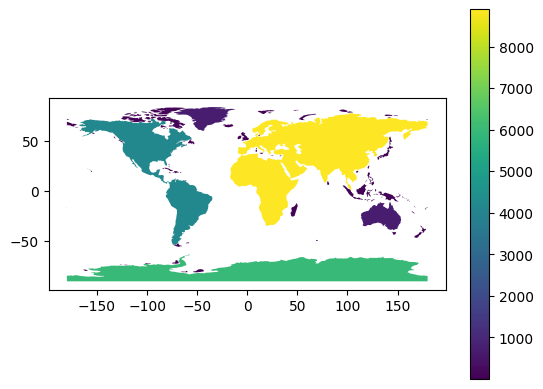

In [11]:
gdf.plot("area", legend=True)

In [12]:
gdf.explore("area", legend=False)

In [13]:
states = geopandas.read_file('data/usa-states-census-2014.shp')
states.explore()

In [18]:
state_temperatures = []
# us_boundary_map = states.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
for state in states.STUSPS:
    state_weather = await client.get(state)
    state_temperatures.append(state_weather.current.temperature)
states['STATETEMPERATURE'] = state_temperatures
# states

In [21]:
states.explore(column="STATETEMPERATURE", cmap="bwr", tooltip="STATETEMPERATURE")